#                                         ***------ (DATA CLEANING) -------***


---



---



#                                     -------(***TRADE DATASET***)--------

In [ ]:
from google.colab import files                                                   # Selecting File Manually
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv("dataset.csv")                                                  # Load the file

print(df.head())
print(df.shape)                                                                  # Data preview
print(df.columns)

                              Dataset Name Observation Date  \
0  Export and Import of Goods and Services      31-Aug-2025   
1  Export and Import of Goods and Services      31-Aug-2025   
2  Export and Import of Goods and Services      31-Aug-2025   
3  Export and Import of Goods and Services      31-Aug-2025   
4  Export and Import of Goods and Services      31-Aug-2025   

                Series Key                                Series Display Name  \
0  TS_GP_BOP_XMGS_M.P00010                 . Goods and Services Balance (A-B)   
1  TS_GP_BOP_XMGS_M.P00020                             1 Goods - Export (FOB)   
2  TS_GP_BOP_XMGS_M.P00030                              2 Exports of Services   
3  TS_GP_BOP_XMGS_M.P00040  ......1 Manufacturing Services on Physical inp...   
4  TS_GP_BOP_XMGS_M.P00050     ......2 Maintenance and Repair Services n.i.e.   

   Observation Value         Unit Observation Status  \
0            -2913.0  Million USD             Normal   
1             2508.0  

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")             # Clean Column Name
df.columns                                                                        # Verifying


Index(['dataset_name', 'observation_date', 'series_key', 'series_display_name',
       'observation_value', 'unit', 'observation_status',
       'observation_status_comment', 'sequence_no.', 'series_name'],
      dtype='object')

In [ ]:
df.drop(
    columns=["dataset_name", "observation_status_comment"],                       # Dropping two unwanted columns
    inplace=True
)

In [ ]:
df.isnull().sum()                                                                 # Checking null cells


,0
observation_date,0
series_key,0
series_display_name,0
observation_value,0
unit,0
observation_status,0
sequence_no.,0
series_name,0


In [ ]:
df = df.drop(columns=[
    "series_key",                                                                 # Dropping columns
    "series_display_name",
    "observation_status"
], errors="ignore")


In [ ]:
df["observation_date"] = pd.to_datetime(
    df["observation_date"], errors="coerce"                                        # Fix Date Types
)


In [ ]:
df["observation_value"] = pd.to_numeric(
    df["observation_value"], errors="coerce"                                      # Fix Numeric Types
)

In [ ]:
df.drop_duplicates(inplace=True)                                                  # Remove Duplicate Rows


In [ ]:
import pandas as pd
import numpy as np
import re


df["trade_type"] = np.where(                                                       # Create new column
    df["series_name"].str.contains("Import", case=False, na=False),
    "Import",
    np.where(
        df["series_name"].str.contains("Export", case=False, na=False),
        "Export",
        "Unknown"
    )
)

In [ ]:
def extract_service_type(text):
    if pd.isna(text):
        return None

    text = re.sub(r"Import|Export", "", text, flags=re.IGNORECASE)                 # Remove Import / Export
    text = re.sub(r"\bof\b|[-_]", " ", text, flags=re.IGNORECASE)                  # Remove common connectors

    return text.strip().title()

df["service_type"] = df["series_name"].apply(extract_service_type)

In [ ]:
print(df[["series_name", "trade_type", "service_type"]].head())                    # Verifying

                                         series_name trade_type  \
0                         Goods and Services Balance    Unknown   
1                               Goods - Export (FOB)     Export   
2                          Exports of Services-Total     Export   
3  Exports of Services-Manufacturing Services on ...     Export   
4  Exports of Services-Maintenance and Repair Ser...     Export   

                                        service_type  
0                         Goods And Services Balance  
1                                     Goods    (Fob)  
2                                 S   Services Total  
3  S   Services Manufacturing Services On Physica...  
4  S   Services Maintenance And Repair Services N...  


In [ ]:
df.columns

Index(['observation_date', 'observation_value', 'unit', 'sequence_no.',
       'series_name', 'trade_type', 'service_type'],
      dtype='object')

In [ ]:
df = df[df["trade_type"] != "Unknown"]                                            # Remove rows where trade_type == "Unknown"

In [ ]:
remove_series = [
    "Exports of Goods and Services-Total",                                        # Remove specific series_name rows
    "Exports of Services-Total",
    "Imports of Services-Total",
    "Imports of Goods and Services-Total"
]

df = df[~df["series_name"].isin(remove_series)]

In [ ]:
df.head()

,observation_date,observation_value,unit,sequence_no.,series_name,trade_type,service_type
1,2025-08-31,2508.0,Million USD,20,Goods - Export (FOB),Export,Goods (Fob)
3,2025-08-31,0.0,Million USD,40,Exports of Services-Manufacturing Services on ...,Export,S Services Manufacturing Services On Physica...
4,2025-08-31,0.0,Million USD,50,Exports of Services-Maintenance and Repair Ser...,Export,S Services Maintenance And Repair Services N...
5,2025-08-31,62.0,Million USD,60,Exports of Services-Transport,Export,S Services Transport
6,2025-08-31,43.0,Million USD,70,Exports of Services-Travel,Export,S Services Travel


In [ ]:
df.to_csv("Cleaned_Trade_dataset.csv", index=False)
files.download("Cleaned_Trade_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# -------(***QIM DATASET***)--------


In [ ]:
from google.colab import files                                                   # Selecting File Manually
uploaded = files.upload()

Saving QIM.csv to QIM.csv


In [ ]:
import pandas as pd
df = pd.read_csv("QIM.csv")                                                      # Load the file


In [ ]:
df = df.drop(columns=[                                                           #Remove Unnecessary Columns
    'Dataset Name',
    'Observation Status',
    'Series Key',
    'Series Display Name',
    'Observation Status Comment'
])


In [ ]:
df['Observation Date'] = pd.to_datetime(df['Observation Date'])                  # Fix Date Column

In [ ]:
df.isnull().sum()                                                                # Checking null values


,0
Observation Date,0
Observation Value,0
Unit,0
Sequence No.,0
Series name,0


In [ ]:
df['Series name'] = df['Series name'].str.replace('Quantum Index - ', '', regex=False)   # Remove unwanted text

In [ ]:
df = df.rename(columns={
    'Observation Date': 'Date',                                                   # Cleaning Column names
    'Observation Value': 'Index_Value',
    'Series name': 'Industry'
})


In [ ]:
df.head()

,Date,Index_Value,Unit,Sequence No.,Industry
0,2025-07-31,115.679655,Index,10,Overall
1,2025-07-31,121.245487,Index,20,Vegetable Ghee
2,2025-07-31,87.872411,Index,30,Tea Blended
3,2025-07-31,67.105116,Index,40,Cigarettes
4,2025-07-31,78.765924,Index,50,Cotton Yarn


In [ ]:
df = df[df['Industry'] != 'Overall']
df['Industry'].unique()


array(['Vegetable Ghee', 'Tea Blended', 'Cigarettes', 'Cotton Yarn',
       'Cotton Cloth', 'Jute Goods', 'Paper & Board', 'Cement',
       'Automobiles', 'Fertilizers'], dtype=object)

In [ ]:
df.to_csv("Cleaned_QIM_dataset.csv", index=False)
files.download("Cleaned_QIM_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# -------***(CLIMATE DATASET)***--------

In [ ]:
from google.colab import files                                                   # Selecting File Manually
uploaded = files.upload()

Saving CLIMATE DATASET.xlsx to CLIMATE DATASET.xlsx


In [ ]:
import pandas as pd                                                               #Load the dataset
df = pd.read_excel("CLIMATE DATASET.xlsx")
df.head()


,Date,Year,Month Number,Month,HotDays_Over35C,Max5DayRainfall_mm,AvgMaxTemp_C,AvgTemp_C,Total_Precipitation_m,Evaporation_m,Surface_Runoff_m
0,2016-01-01,2016,1,January,0.00,11.10,16.48,11.493314,0.000560,-0.001088,0.000016
1,2016-02-01,2016,2,February,0.24,11.48,19.84,12.790000,0.000132,-0.001087,0.000015
2,2016-03-01,2016,3,March,2.19,35.37,23.30,17.443098,0.001594,-0.001377,0.000096
3,2016-04-01,2016,4,April,11.56,19.15,29.23,21.735370,0.000779,-0.001394,0.000115
4,2016-05-01,2016,5,May,22.36,6.68,35.23,28.263426,0.000255,-0.001163,0.000027


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   117 non-null    datetime64[ns]
 1   Year                   117 non-null    int64         
 2   Month Number           117 non-null    int64         
 3   Month                  117 non-null    object        
 4   HotDays_Over35C        117 non-null    float64       
 5   Max5DayRainfall_mm     117 non-null    float64       
 6   AvgMaxTemp_C           117 non-null    float64       
 7   AvgTemp_C              117 non-null    float64       
 8   Total_Precipitation_m  117 non-null    float64       
 9   Evaporation_m          117 non-null    float64       
 10  Surface_Runoff_m       117 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 10.2+ KB


In [ ]:
df.shape


(117, 11)

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")             #Clean column names
df.columns


Index(['date', 'year', 'month_number', 'month', 'hotdays_over35c',
       'max5dayrainfall_mm', 'avgmaxtemp_c', 'avgtemp_c',
       'total_precipitation_m', 'evaporation_m', 'surface_runoff_m'],
      dtype='object')

In [ ]:
df = df.drop_duplicates()                                                         #Remove duplicate rows
df.shape


(117, 11)

In [ ]:
df = df.dropna(how="all")                                                         #Remove empty rows
df = df.dropna(axis=1, how="all")                                                 #Remove empty columns


In [ ]:
df.info()                                                                          #Verifying
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   117 non-null    datetime64[ns]
 1   year                   117 non-null    int64         
 2   month_number           117 non-null    int64         
 3   month                  117 non-null    object        
 4   hotdays_over35c        117 non-null    float64       
 5   max5dayrainfall_mm     117 non-null    float64       
 6   avgmaxtemp_c           117 non-null    float64       
 7   avgtemp_c              117 non-null    float64       
 8   total_precipitation_m  117 non-null    float64       
 9   evaporation_m          117 non-null    float64       
 10  surface_runoff_m       117 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 10.2+ KB


,date,year,month_number,month,hotdays_over35c,max5dayrainfall_mm,avgmaxtemp_c,avgtemp_c,total_precipitation_m,evaporation_m,surface_runoff_m
0,2016-01-01,2016,1,January,0.00,11.10,16.48,11.493314,0.000560,-0.001088,0.000016
1,2016-02-01,2016,2,February,0.24,11.48,19.84,12.790000,0.000132,-0.001087,0.000015
2,2016-03-01,2016,3,March,2.19,35.37,23.30,17.443098,0.001594,-0.001377,0.000096
3,2016-04-01,2016,4,April,11.56,19.15,29.23,21.735370,0.000779,-0.001394,0.000115
4,2016-05-01,2016,5,May,22.36,6.68,35.23,28.263426,0.000255,-0.001163,0.000027


In [ ]:
df.to_excel("CLEANED CLIMATE DATASET (1).xlsx", index=False)                      #Save cleaned dataset

In [ ]:
files.download("CLEANED CLIMATE DATASET (1).xlsx")                                 #Download cleaned dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ------ ***(DATA VISUALIZATION)*** -------

---



---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for later plots
sns.set(style="whitegrid")

# --- LOAD THE DATASETS ---
try:
    # --- FIX IS HERE: Use read_excel for the .xlsx file ---
    climate_df = pd.read_excel('CLEANED CLIMATE DATASET (1).xlsx')

    # These are .csv files, so read_csv is correct for them
    qim_df = pd.read_csv('Cleaned_QIM_dataset (1).csv')
    trade_df = pd.read_csv('Cleaned_Trade_dataset.csv')

    print("✅ All datasets loaded successfully!")

    # Optional: Print the first 3 rows to check
    print("\n--- Climate Data Sample ---")
    print(climate_df.head(3))
    print("\n--- QIM (Manufacturing) Sample ---")
    print(qim_df.head(3))
    print("\n--- Trade Data Sample ---")
    print(trade_df.head(3))

except FileNotFoundError as e:
    print(f"❌ Error: {e}")
    print("Please check the filenames in your folder.")
except Exception as e:
    print(f"❌ An error occurred: {e}")

✅ All datasets loaded successfully!

--- Climate Data Sample ---
        Date  Year  Month Number    Month   HotDays_Over35C  \
0 2016-01-01  2016             1   January             0.00   
1 2016-02-01  2016             2  February             0.24   
2 2016-03-01  2016             3     March             2.19   

   Max5DayRainfall_mm  AvgMaxTemp_C  AvgTemp_C  Total_Precipitation_m  \
0               11.10         16.48  11.493314               0.000560   
1               11.48         19.84  12.790000               0.000132   
2               35.37         23.30  17.443098               0.001594   

   Evaporation_m  Surface_Runoff_m  
0      -0.001088          0.000016  
1      -0.001087          0.000015  
2      -0.001377          0.000096  

--- QIM (Manufacturing) Sample ---
         Date  Index_Value   Unit  Sequence No.        Industry
0  2025-07-31   115.679655  Index            10         Overall
1  2025-07-31   121.245487  Index            20  Vegetable Ghee
2  2025-07-31

In [ ]:
# --- 1. CONVERT DATES ---
climate_df['Date'] = pd.to_datetime(climate_df['Date'])
qim_df['Date'] = pd.to_datetime(qim_df['Date'])
trade_df['observation_date'] = pd.to_datetime(trade_df['observation_date'])

# --- 2. NORMALIZE DATES (To 1st of Month) ---
# This aligns all datasets so we can merge them
climate_df['Date_Month'] = climate_df['Date'].dt.to_period('M').dt.to_timestamp()
qim_df['Date_Month'] = qim_df['Date'].dt.to_period('M').dt.to_timestamp()
trade_df['Date_Month'] = trade_df['observation_date'].dt.to_period('M').dt.to_timestamp()

# --- 3. PREPARE SUB-DATASETS ---
# Pivot Manufacturing Data (to get columns like 'Overall', 'Textile', etc.)
qim_pivot = qim_df.pivot_table(index='Date_Month', columns='Industry', values='Index_Value').reset_index()

# Pivot Trade Data (to get 'Imports' and 'Exports' as columns)
trade_pivot = trade_df[trade_df['series_name'].isin(['Goods - Import (FOB)', 'Goods - Export (FOB)'])]
trade_pivot = trade_pivot.pivot_table(index='Date_Month', columns='series_name', values='observation_value').reset_index()
trade_pivot.rename(columns={'Goods - Import (FOB)': 'Imports', 'Goods - Export (FOB)': 'Exports'}, inplace=True)

# --- 4. MASTER MERGE ---
# Combine everything into one big table
master_df = pd.merge(climate_df, qim_pivot, on='Date_Month', how='inner')
master_df = pd.merge(master_df, trade_pivot, on='Date_Month', how='inner')

print(f"Master Dataset Ready! Shape: {master_df.shape}")
print(master_df.head(3))

Master Dataset Ready! Shape: (109, 25)
        Date  Year  Month Number     Month   HotDays_Over35C  \
0 2016-07-01  2016             7       July            19.82   
1 2016-08-01  2016             8     August            15.54   
2 2016-09-01  2016             9  September            16.27   

   Max5DayRainfall_mm  AvgMaxTemp_C  AvgTemp_C  Total_Precipitation_m  \
0               28.98         34.74  30.934698               0.000069   
1               37.05         32.87  28.516626               0.000033   
2                8.21         32.77  27.177523               0.000016   

   Evaporation_m  ...  Cotton Cloth Cotton Yarn  Fertilizers  Jute Goods  \
0      -0.001004  ...    100.521275  100.291200   103.952706   58.074652   
1      -0.000784  ...    100.636750  100.182672   107.921936   68.129368   
2      -0.000808  ...    100.694488  100.441660   109.090338   60.284956   

     Overall  Paper & Board  Tea Blended  Vegetable Ghee  Exports  Imports  
0  91.701363      90.955137  

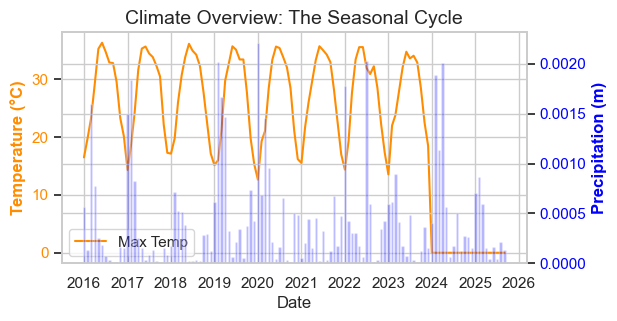

In [ ]:
#VISUAL1: Climate Overview,Displays the seasonal temperature and rainfall patterns.

plt.figure(figsize=(6, 3))

# Plot Temperature (Line)
ax1 = sns.lineplot(data=climate_df, x='Date', y='AvgMaxTemp_C', color='darkorange', label='Max Temp')
ax1.set_ylabel('Temperature (°C)', color='darkorange', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='darkorange')

# Plot Rainfall (Bars) on secondary axis
ax2 = plt.twinx()
ax2.bar(climate_df['Date'], climate_df['Total_Precipitation_m'], color='blue', alpha=0.3, width=20, label='Rainfall')
ax2.set_ylabel('Precipitation (m)', color='blue', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Climate Overview: The Seasonal Cycle', fontsize=14)
plt.show()

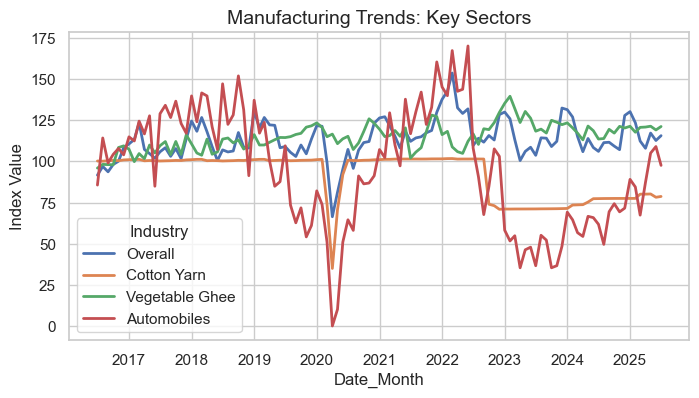

In [ ]:
#VISUAL2: Manufacturing Trends,Shows how different industries are performing over time.

plt.figure(figsize=(8, 4))

# Select key sectors to plot
sectors = ['Overall', 'Cotton Yarn', 'Vegetable Ghee', 'Automobiles']
# Filter for sectors that actually exist in the data
valid_sectors = [s for s in sectors if s in qim_pivot.columns]

for col in valid_sectors:
    sns.lineplot(data=qim_pivot, x='Date_Month', y=col, label=col, linewidth=2)

plt.title('Manufacturing Trends: Key Sectors', fontsize=14)
plt.ylabel('Index Value')
plt.legend(title='Industry')
plt.show()

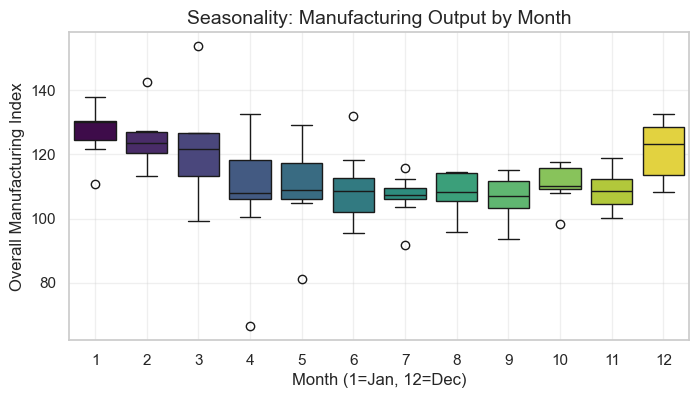

In [ ]:
#VISUAL3: Seasonality Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Load QIM (Manufacturing) Data
try:
    qim_df = pd.read_csv('Cleaned_QIM_dataset (1).csv')
    qim_df['Date'] = pd.to_datetime(qim_df['Date'])

    # Create Date_Month for grouping
    qim_df['Date_Month'] = qim_df['Date'].dt.to_period('M').dt.to_timestamp()

    # Pivot to get 'Overall' as a column (like in the original master_df)
    master_df = qim_df.pivot_table(index='Date_Month', columns='Industry', values='Index_Value').reset_index()

    # --- 2. PREPARE FOR PLOTTING ---
    # Extract Month Number (1=Jan, 12=Dec)
    master_df['Month_Num'] = master_df['Date_Month'].dt.month

    # --- 3. PLOT SEASONALITY
    plt.figure(figsize=(8, 4))

    sns.boxplot(
        data=master_df,
        x='Month_Num',
        y='Overall',
        hue='Month_Num',
        palette='viridis',
        legend=False
    )

    plt.title('Seasonality: Manufacturing Output by Month', fontsize=14)
    plt.xlabel('Month (1=Jan, 12=Dec)')
    plt.ylabel('Overall Manufacturing Index')
    plt.grid(True, alpha=0.3)

    plt.show()

except FileNotFoundError:
    print("❌ Error: 'Cleaned_QIM_dataset (1).csv' not found. Please check the file name.")
except Exception as e:
    print(f"❌ An error occurred: {e}")

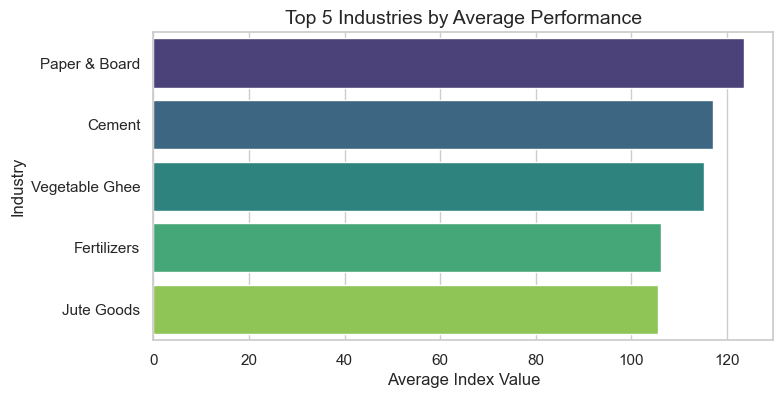

In [ ]:
#VISUAL4: TOP 5 INDUSTRIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# --- 1. PREPARE THE DATA ---
qim_df = pd.read_csv('Cleaned_QIM_dataset (1).csv')

# Filter out 'Overall'
industry_df = qim_df[qim_df['Industry'] != 'Overall']

# Calculate Ranking
ranking = industry_df.groupby('Industry')['Index_Value'].mean().sort_values(ascending=False).reset_index()
top_5 = ranking.head(5)

# --- 2. PLOT THE BAR CHART (FIXED) ---
plt.figure(figsize=(8, 4))

# FIX: Added 'hue' and 'legend=False' to silence the warning
sns.barplot(
    data=top_5,
    x='Index_Value',
    y='Industry',
    hue='Industry',    # Color based on Industry
    palette='viridis',
    legend=False       # Hide the redundant legend
)

plt.title('Top 5 Industries by Average Performance', fontsize=14)
plt.xlabel('Average Index Value')
plt.ylabel('Industry')

plt.show()

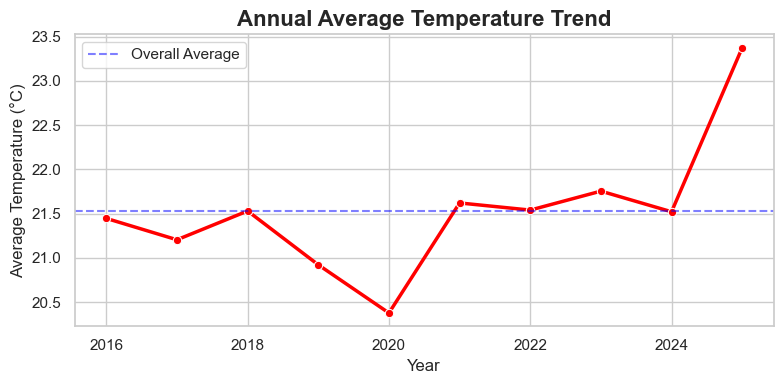

In [ ]:
#VISUAL5: Annual Avg Temp Trend
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- FIX: Load the dataset first ---
try:
    # Try loading the CSV file
    climate = pd.read_csv('CLEANED CLIMATE DATASET (1).xlsx - Sheet1 (2).csv')
except:
    # If CSV fails, try the Excel file
    climate = pd.read_excel('CLEANED CLIMATE DATASET (1).xlsx')

# 1. Ensure your Date column is in the correct datetime format
climate['Date'] = pd.to_datetime(climate['Date'])

# 2. Extract Year
climate['Year'] = climate['Date'].dt.year

# 3. Aggregate data to get the average temperature per year
annual_trend = climate.groupby('Year')['AvgTemp_C'].mean().reset_index()

# 4. Create the visualization
plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid")

# Main trend line
sns.lineplot(
    data=annual_trend,
    x='Year',
    y='AvgTemp_C',
    color='red',
    marker='o',
    linewidth=2.5
)

# Adding labels and titles
plt.title('Annual Average Temperature Trend', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12) # Fixed typo (removed 180)

# Add a horizontal line for the overall mean
plt.axhline(
    annual_trend['AvgTemp_C'].mean(),
    color='blue',
    linestyle='--',
    alpha=0.5,
    label='Overall Average'
)

plt.legend()
plt.tight_layout()
plt.show()

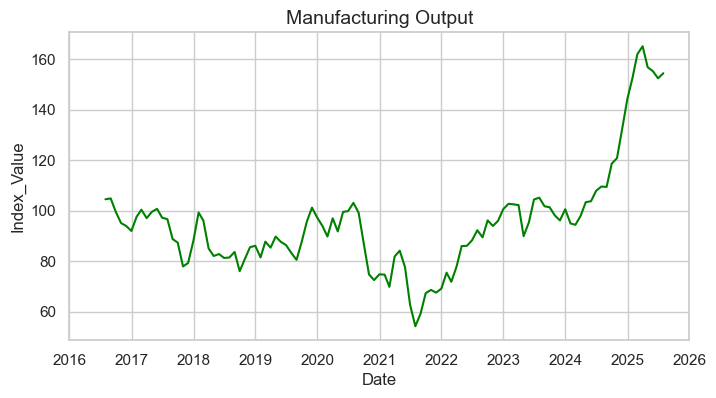

In [ ]:
#VISUAL6: Manufacturing Output
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Setup the style
sns.set_theme(style="whitegrid")

# 2. Create sample data
# --- FIX: Changed freq='M' to freq='ME' ---
dates = pd.date_range(start='2016-07-01', end='2025-08-01', freq='ME')

# Generating a random trend for demonstration
values = 100 + np.cumsum(np.random.randn(len(dates)) * 5)
df = pd.DataFrame({'Date': dates, 'Index_Value': values})

# 3. Initialize the figure size
plt.figure(figsize=(8, 4))

# 4. Create the line plot
sns.lineplot(data=df, x='Date', y='Index_Value', color='green', linewidth=1.5)

# 5. Customize the labels and title
plt.title('Manufacturing Output', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Index_Value', fontsize=12)

# 6. Adjust the x-axis to show years clearly
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2026-01-01'))

# Display the final plot
plt.show()

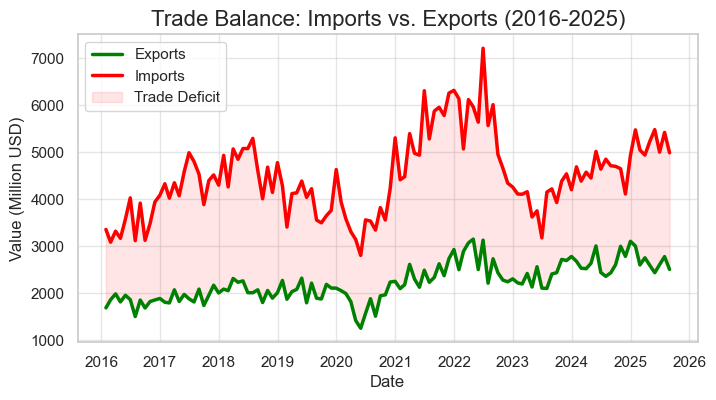

In [ ]:
#VISUAL7: Trade Balance(imp vs exp)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# --- 1. LOAD DATA ---
try:
    trade_df = pd.read_csv('Cleaned_Trade_dataset.csv')

    # --- 2. PROCESS DATA ---
    # Convert Date
    trade_df['observation_date'] = pd.to_datetime(trade_df['observation_date'])

    # Filter for the requested time period (2016 - 2025)
    filtered_trade = trade_df[
        (trade_df['observation_date'] >= '2016-01-01') &
        (trade_df['observation_date'] <= '2025-12-31')
    ].copy() # Added .copy() here just to be safe

    # Filter for only Imports and Exports AND use .copy() to fix the warning
    # --- FIX IS HERE ---
    plot_data = filtered_trade[filtered_trade['series_name'].isin(['Goods - Import (FOB)', 'Goods - Export (FOB)'])].copy()

    # Rename for cleaner Legend (Now safe to do because it's a copy)
    plot_data['Trade Type'] = plot_data['series_name'].replace({
        'Goods - Import (FOB)': 'Imports',
        'Goods - Export (FOB)': 'Exports'
    })

    # --- 3. VISUALIZATION ---
    plt.figure(figsize=(8, 4))

    # Plot the lines
    sns.lineplot(
        data=plot_data,
        x='observation_date',
        y='observation_value',
        hue='Trade Type',
        palette={'Imports': 'red', 'Exports': 'green'},
        linewidth=2.5
    )

    # --- BONUS: Shade the Deficit Area ---
    # Pivot to get columns for fill_between
    pivot_df = plot_data.pivot(index='observation_date', columns='Trade Type', values='observation_value')

    plt.fill_between(
        pivot_df.index,
        pivot_df['Exports'],
        pivot_df['Imports'],
        where=(pivot_df['Imports'] > pivot_df['Exports']),
        color='red',
        alpha=0.1,
        label='Trade Deficit'
    )

    plt.title('Trade Balance: Imports vs. Exports (2016-2025)', fontsize=16)
    plt.ylabel('Value (Million USD)', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.5)

    plt.show()

except FileNotFoundError:
    print("❌ Error: 'Cleaned_Trade_dataset.csv' not found.")
except Exception as e:
    print(f"❌ An error occurred: {e}")

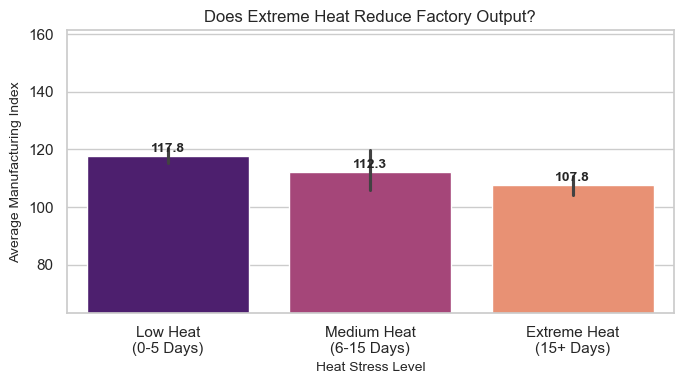

In [ ]:
#VISUAL8: Manufacturing Index by Heat Stress Level
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# --- 1. LOAD & PREPARE DATA ---
try:
    # Load Data
    try:
        climate_df = pd.read_csv('CLEANED CLIMATE DATASET (1).xlsx - Sheet1 (2).csv')
    except:
        climate_df = pd.read_excel('CLEANED CLIMATE DATASET (1).xlsx')

    qim_df = pd.read_csv('Cleaned_QIM_dataset (1).csv')

    # Convert Dates
    climate_df['Date'] = pd.to_datetime(climate_df['Date'])
    qim_df['Date'] = pd.to_datetime(qim_df['Date'])

    # Align Dates
    climate_df['Date_Month'] = climate_df['Date'].dt.to_period('M').dt.to_timestamp()
    qim_df['Date_Month'] = qim_df['Date'].dt.to_period('M').dt.to_timestamp()

    # Filter QIM for 'Overall'
    qim_overall = qim_df[qim_df['Industry'] == 'Overall'].copy()

    # Merge
    analysis_df = pd.merge(climate_df, qim_overall, on='Date_Month', how='inner')
    analysis_df.rename(columns={'Index_Value': 'Industry_Output'}, inplace=True)

    # --- 2. CREATE CATEGORIES ---
    def classify_heat(days):
        if days <= 5:
            return 'Low Heat\n(0-5 Days)'
        elif days <= 15:
            return 'Medium Heat\n(6-15 Days)'
        else:
            return 'Extreme Heat\n(15+ Days)'

    analysis_df['Heat_Level'] = analysis_df['HotDays_Over35C'].apply(classify_heat)
    order_list = ['Low Heat\n(0-5 Days)', 'Medium Heat\n(6-15 Days)', 'Extreme Heat\n(15+ Days)']

    # --- 3. PLOT (SMALLER SIZE) ---
    # FIX: Smaller figure size
    plt.figure(figsize=(7, 4))

    ax = sns.barplot(
        data=analysis_df,
        x='Heat_Level',
        y='Industry_Output',
        order=order_list,
        palette='magma_r',
        hue='Heat_Level',
        dodge=False
    )

    if ax.get_legend() is not None:
        ax.get_legend().remove()

    plt.title('Does Extreme Heat Reduce Factory Output?', fontsize=12)
    plt.ylabel('Average Manufacturing Index', fontsize=10)
    plt.xlabel('Heat Stress Level', fontsize=10)

    # Add labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha = 'center', va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points',
                        fontsize=10, fontweight='bold')

    plt.ylim(analysis_df['Industry_Output'].min() * 0.95, analysis_df['Industry_Output'].max() * 1.05)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"❌ Error: {e}")

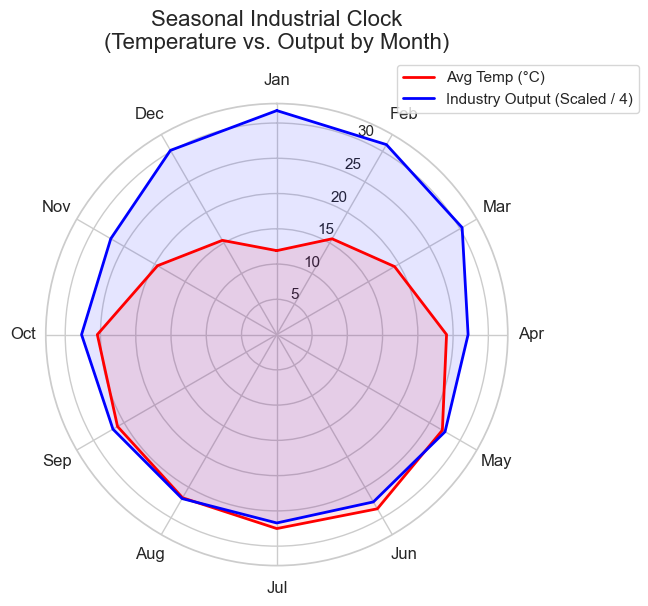

In [ ]:
#VISUAL9: Temp vs Output by Month(seasonal industrial clock)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set visual style
sns.set(style="whitegrid")

# --- 1. LOAD & PREPARE DATA ---
try:
    # Load Data
    try:
        climate_df = pd.read_csv('CLEANED CLIMATE DATASET (1).xlsx - Sheet1 (2).csv')
    except:
        climate_df = pd.read_excel('CLEANED CLIMATE DATASET (1).xlsx')

    qim_df = pd.read_csv('Cleaned_QIM_dataset (1).csv')

    # Convert Dates
    climate_df['Date'] = pd.to_datetime(climate_df['Date'])
    qim_df['Date'] = pd.to_datetime(qim_df['Date'])

    # Extract Month Number (1=Jan, 2=Feb...)
    climate_df['Month_Num'] = climate_df['Date'].dt.month
    qim_df['Month_Num'] = qim_df['Date'].dt.month

    # Filter QIM for 'Overall' Industry
    qim_overall = qim_df[qim_df['Industry'] == 'Overall'].copy()

    # --- 2. CALCULATE MONTHLY AVERAGES (Fixing the NameError) ---
    # We calculate the mean value for each month (1-12)
    monthly_temp = climate_df.groupby('Month_Num')['AvgMaxTemp_C'].mean().sort_index()
    monthly_qim = qim_overall.groupby('Month_Num')['Index_Value'].mean().sort_index()

    # --- 3. PREPARE RADAR PLOT DATA ---
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    angles = np.linspace(0, 2 * np.pi, len(months), endpoint=False).tolist()

    # "CLOSE THE CIRCLE"
    # Radar charts must connect the last point (Dec) back to the first (Jan)
    angles += angles[:1]
    temp_vals = monthly_temp.tolist() + [monthly_temp.iloc[0]]
    qim_vals = monthly_qim.tolist() + [monthly_qim.iloc[0]]

    # --- 4. CREATE POLAR PLOT ---
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

    # Plot Temperature (Red)
    ax.plot(angles, temp_vals, color='red', linewidth=2, label='Avg Temp (°C)')
    ax.fill(angles, temp_vals, color='red', alpha=0.1)

    # Plot Industry Output (Blue)
    # We scale it down (divide by 4) so it fits on the same chart as Temperature
    qim_scaled = [x/4 for x in qim_vals]
    ax.plot(angles, qim_scaled, color='blue', linewidth=2, label='Industry Output (Scaled / 4)')
    ax.fill(angles, qim_scaled, color='blue', alpha=0.1)

    # --- 5. CUSTOMIZE THE "CLOCK" ---
    ax.set_theta_offset(np.pi / 2) # Start Jan at the very top (12 o'clock)
    ax.set_theta_direction(-1)     # Make months go clockwise
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(months, fontsize=12)

    # --- 6. FINALIZE LAYOUT ---
    plt.title("Seasonal Industrial Clock\n(Temperature vs. Output by Month)", size=16, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.show()

except Exception as e:
    print(f"❌ Error: {e}")

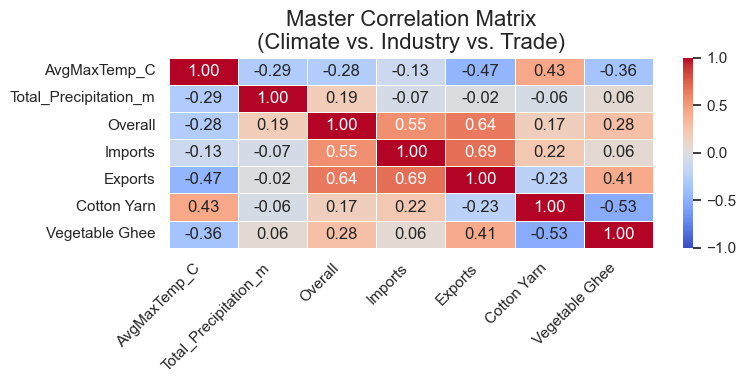

In [ ]:
#VISUAL10: Corelation Matrix(Trade vs Climate vs QIM)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# --- 1. LOAD DATA ---
try:
    # Load all three datasets
    try:
        climate_df = pd.read_csv('CLEANED CLIMATE DATASET (1).xlsx - Sheet1 (2).csv')
    except:
        climate_df = pd.read_excel('CLEANED CLIMATE DATASET (1).xlsx')

    qim_df = pd.read_csv('Cleaned_QIM_dataset (1).csv')
    trade_df = pd.read_csv('Cleaned_Trade_dataset.csv')

    # --- 2. PREPROCESS & ALIGN DATES ---
    # Convert to datetime
    climate_df['Date'] = pd.to_datetime(climate_df['Date'])
    qim_df['Date'] = pd.to_datetime(qim_df['Date'])
    trade_df['observation_date'] = pd.to_datetime(trade_df['observation_date'])

    # Normalize to 'Month Start' for perfect merging
    climate_df['Date_Month'] = climate_df['Date'].dt.to_period('M').dt.to_timestamp()
    qim_df['Date_Month'] = qim_df['Date'].dt.to_period('M').dt.to_timestamp()
    trade_df['Date_Month'] = trade_df['observation_date'].dt.to_period('M').dt.to_timestamp()

    # --- 3. PREPARE SUB-TABLES ---
    # Climate: Pick key weather variables
    climate_merge = climate_df[['Date_Month', 'AvgMaxTemp_C', 'Total_Precipitation_m', 'HotDays_Over35C']]

    # Manufacturing (QIM): Pivot to get industries as columns
    qim_pivot = qim_df.pivot_table(index='Date_Month', columns='Industry', values='Index_Value').reset_index()

    # Trade: Pivot to get Imports & Exports as columns
    trade_pivot = trade_df[trade_df['series_name'].isin(['Goods - Import (FOB)', 'Goods - Export (FOB)'])]
    trade_pivot = trade_pivot.pivot_table(index='Date_Month', columns='series_name', values='observation_value').reset_index()
    trade_pivot.rename(columns={'Goods - Import (FOB)': 'Imports', 'Goods - Export (FOB)': 'Exports'}, inplace=True)

    # --- 4. MERGE EVERYTHING ---
    master_df = pd.merge(climate_merge, qim_pivot, on='Date_Month', how='inner')
    master_df = pd.merge(master_df, trade_pivot, on='Date_Month', how='inner')

    # --- 5. SELECT COLUMNS FOR MATRIX ---
    # Choose the most important variables to analyze
    target_cols = [
        'AvgMaxTemp_C',
        'Total_Precipitation_m',
        'Overall',          # Overall Manufacturing
        'Imports',
        'Exports',
        'Cotton Yarn',      # Key Industry 1
        'Vegetable Ghee'    # Key Industry 2
    ]

    # Filter to ensure columns actually exist in the data
    valid_cols = [c for c in target_cols if c in master_df.columns]

    # --- 6. PLOT HEATMAP ---
    plt.figure(figsize=(8, 4))

    # Calculate Correlation
    corr_matrix = master_df[valid_cols].corr()

    # Create Heatmap
    sns.heatmap(
        corr_matrix,
        annot=True,           # Show correlation numbers
        cmap='coolwarm',      # Color scheme (Red=Pos, Blue=Neg)
        fmt=".2f",            # Format to 2 decimal places
        linewidths=0.5,
        center=0,
        vmin=-1, vmax=1       # Set scale from -1 to 1
    )

    plt.title('Master Correlation Matrix\n(Climate vs. Industry vs. Trade)', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"❌ Error: {e}")

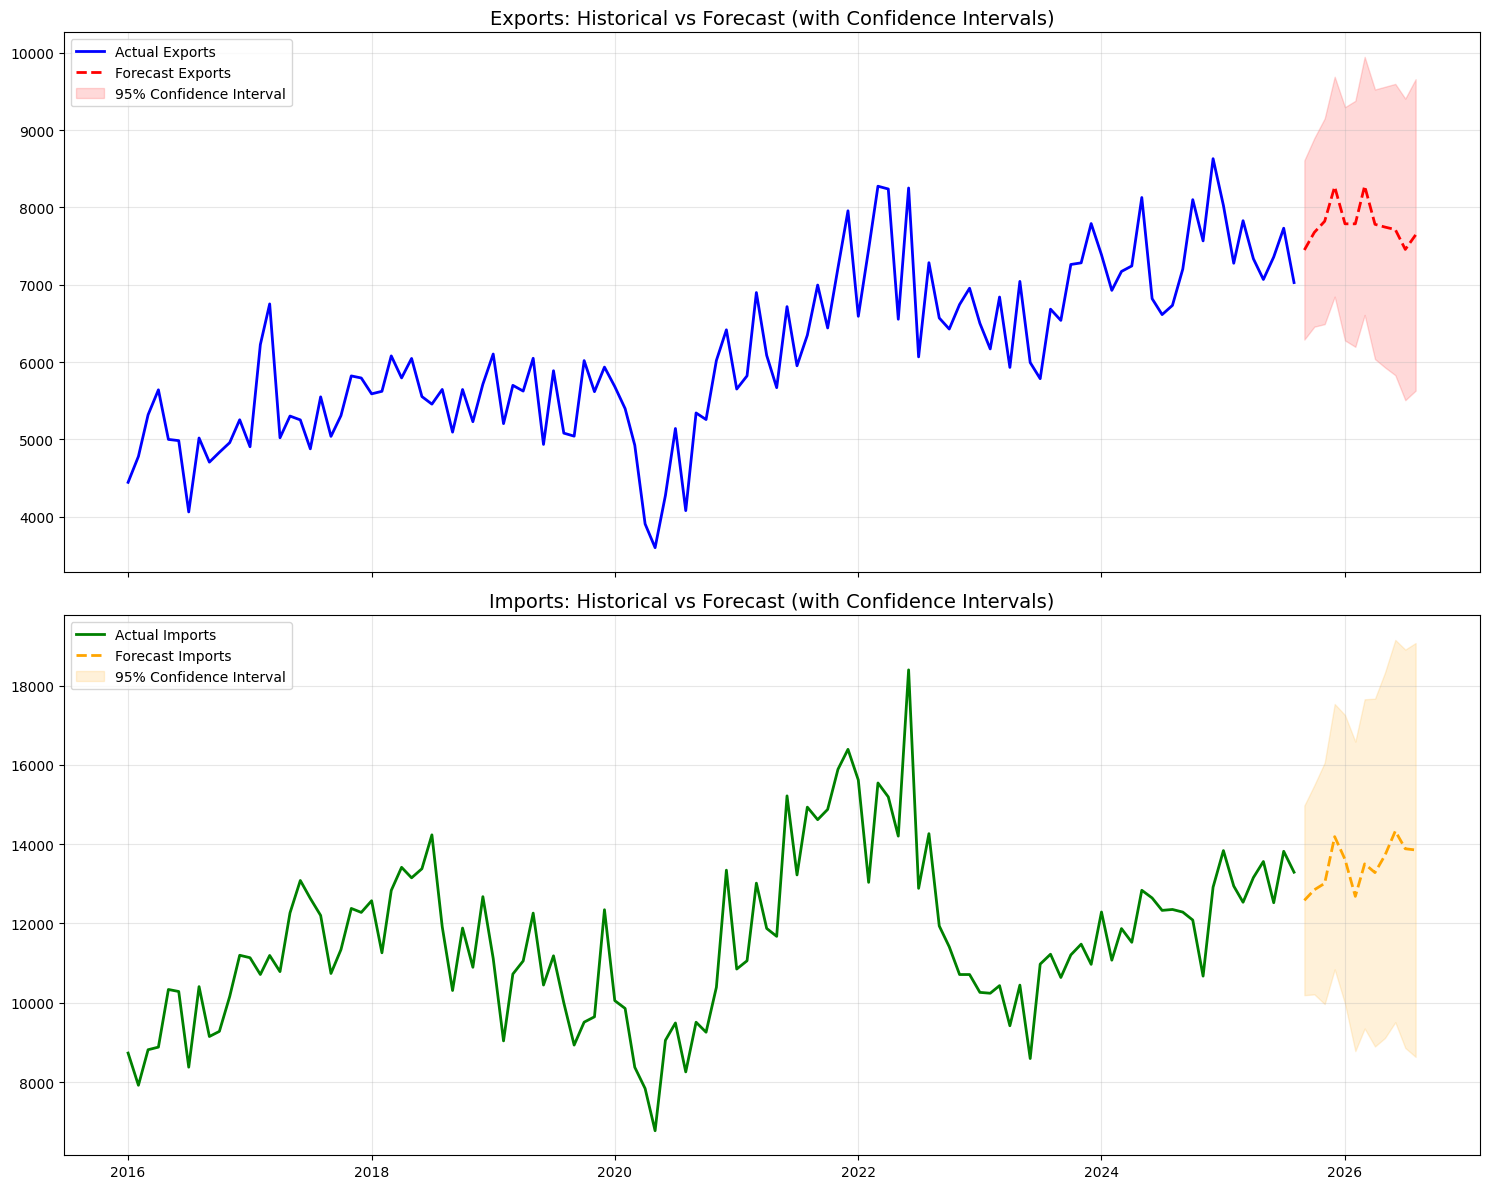

,Month,Imports,Exports,Data_Type,Balance_of_Trade
0,2016-01-01,8730.000000,4446.000000,Actual,-4284.000000
1,2016-02-01,7918.000000,4781.000000,Actual,-3137.000000
2,2016-03-01,8814.000000,5319.000000,Actual,-3495.000000
3,2016-04-01,8880.000000,5642.000000,Actual,-3238.000000
4,2016-05-01,10334.000000,5001.000000,Actual,-5333.000000
...,...,...,...,...,...
126,2026-04-01,13282.151252,7782.560199,Forecast,-5499.591054
127,2026-05-01,13718.690526,7746.421509,Forecast,-5972.269016
128,2026-06-01,14329.126142,7714.538236,Forecast,-6614.587906
129,2026-07-01,13882.997851,7457.759056,Forecast,-6425.238795


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import warnings

warnings.filterwarnings("ignore")

# --- UPDATE THESE FOR CLOUD ENVIRONMENTS ---
TRADE_PATH = "TRADE DATASET.csv"
QIM_PATH = "QIM DATASET.xlsx"
CLIMATE_PATH = "CLEANED CLIMATE DATASET.xlsx"

FORECAST_HORIZON = 12
OVERLAP_MONTHS = 3
RANDOM_SEED = 42

# --- LOAD DATA ---
trade = pd.read_csv(TRADE_PATH)
qim = pd.read_excel(QIM_PATH)
climate = pd.read_excel(CLIMATE_PATH)

# --- HELPER FUNCTIONS ---

def normalize_month(df, date_col_guess=None):
    df = df.copy()
    if 'Observation Date' in df.columns:
        date_col_guess = 'Observation Date'
    elif 'Date' in df.columns:
        date_col_guess = 'Date'

    if date_col_guess and date_col_guess in df.columns:
        df['Month'] = pd.to_datetime(df[date_col_guess], errors='coerce').dt.to_period('M').dt.to_timestamp()
    else:
        df['Month'] = pd.to_datetime(df.iloc[:,0], errors='coerce').dt.to_period('M').dt.to_timestamp()

    df = df.dropna(subset=['Month']).sort_values('Month').reset_index(drop=True)
    return df

def prepare_exog(df_indexed, exog_cols, scaler=None, fill_method='ffill'):
    X = df_indexed[exog_cols].copy()
    X = X.select_dtypes(include=[np.number])
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(method=fill_method, inplace=True)
    X.fillna(method='bfill', inplace=True)

    if scaler is None:
        scaler = StandardScaler()
        X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
    else:
        X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)
    return X_scaled, scaler

# --- DATA PREPARATION ---
trade = normalize_month(trade)
qim = normalize_month(qim)
climate = normalize_month(climate)

trade_monthly = trade.groupby(['Month','Trade Type'])['Observation Value'].sum().reset_index()
trade_pivot = trade_monthly.pivot(index='Month', columns='Trade Type', values='Observation Value').reset_index()
trade_pivot.columns.name = None

rename_map = {}
for c in trade_pivot.columns:
    if isinstance(c, str):
        lc = c.lower()
        if 'import' in lc: rename_map[c] = 'Total_Imports'
        elif 'export' in lc: rename_map[c] = 'Total_Exports'
trade_pivot = trade_pivot.rename(columns=rename_map)

numeric_climate_cols = ['Month'] + [c for c in climate.columns if climate[c].dtype.kind in 'fi' and c!='Month']
climate_monthly = climate[numeric_climate_cols].drop_duplicates(subset='Month').reset_index(drop=True)

final_merged = trade_pivot.merge(climate_monthly, on='Month', how='left').fillna(method='ffill').fillna(method='bfill')
df = final_merged.copy()
df['month'] = df['Month'].dt.month

# --- FINAL MODEL TRAINING & FORECASTING ---
exog_vars = ['month']

# 1. Imports Model
X_final_imp, scaler_final_imp = prepare_exog(df.set_index('Month'), exog_vars)
y_target_imp = df.set_index('Month')['Total_Imports'].loc[X_final_imp.index]
y_scaler_imp = MinMaxScaler().fit(y_target_imp.values.reshape(-1, 1))
y_scaled_imp = pd.Series(y_scaler_imp.transform(y_target_imp.values.reshape(-1, 1)).flatten(), index=y_target_imp.index)

res_imp = SARIMAX(y_scaled_imp, exog=X_final_imp, order=(1,1,1), seasonal_order=(0,1,1,12)).fit(disp=False)
fitted_imp = y_scaler_imp.inverse_transform(res_imp.fittedvalues.values.reshape(-1, 1)).flatten()

# 2. Exports Model
X_final_exp, scaler_final_exp = prepare_exog(df.set_index('Month'), exog_vars)
y_target_exp = df.set_index('Month')['Total_Exports'].loc[X_final_exp.index]
y_scaler_exp = MinMaxScaler().fit(y_target_exp.values.reshape(-1, 1))
y_scaled_exp = pd.Series(y_scaler_exp.transform(y_target_exp.values.reshape(-1, 1)).flatten(), index=y_target_exp.index)

res_exp = SARIMAX(y_scaled_exp, exog=X_final_exp, order=(1,1,1), seasonal_order=(0,1,1,12)).fit(disp=False)
fitted_exp = y_scaler_exp.inverse_transform(res_exp.fittedvalues.values.reshape(-1, 1)).flatten()

# 3. Future Forecast with Confidence Intervals
future_dates = pd.date_range(start=df['Month'].max(), periods=FORECAST_HORIZON + 1, freq='MS')[1:]
X_future = pd.DataFrame({'month': future_dates.month}, index=future_dates)
X_future_scaled_imp, _ = prepare_exog(X_future, exog_vars, scaler=scaler_final_imp)
X_future_scaled_exp, _ = prepare_exog(X_future, exog_vars, scaler=scaler_final_exp)

# Imports Forecast Obj
fcast_obj_imp = res_imp.get_forecast(steps=FORECAST_HORIZON, exog=X_future_scaled_imp)
fcast_imp = y_scaler_imp.inverse_transform(fcast_obj_imp.predicted_mean.values.reshape(-1, 1)).flatten()
conf_imp = fcast_obj_imp.conf_int()
low_imp = y_scaler_imp.inverse_transform(conf_imp.iloc[:, 0].values.reshape(-1, 1)).flatten()
up_imp = y_scaler_imp.inverse_transform(conf_imp.iloc[:, 1].values.reshape(-1, 1)).flatten()

# Exports Forecast Obj
fcast_obj_exp = res_exp.get_forecast(steps=FORECAST_HORIZON, exog=X_future_scaled_exp)
fcast_exp = y_scaler_exp.inverse_transform(fcast_obj_exp.predicted_mean.values.reshape(-1, 1)).flatten()
conf_exp = fcast_obj_exp.conf_int()
low_exp = y_scaler_exp.inverse_transform(conf_exp.iloc[:, 0].values.reshape(-1, 1)).flatten()
up_exp = y_scaler_exp.inverse_transform(conf_exp.iloc[:, 1].values.reshape(-1, 1)).flatten()

# --- CONSTRUCT FINAL_OUTPUT_DF ---
actuals_df = df[['Month', 'Total_Imports', 'Total_Exports']].copy().rename(columns={'Total_Imports': 'Imports', 'Total_Exports': 'Exports'})
actuals_df['Data_Type'] = 'Actual'

overlap_df = pd.DataFrame({
    'Month': df['Month'].iloc[-OVERLAP_MONTHS:],
    'Imports': fitted_imp[-OVERLAP_MONTHS:],
    'Exports': fitted_exp[-OVERLAP_MONTHS:]
})
future_df = pd.DataFrame({'Month': future_dates, 'Imports': fcast_imp, 'Exports': fcast_exp})
full_forecast_df = pd.concat([overlap_df, future_df], ignore_index=True)
full_forecast_df['Data_Type'] = 'Forecast'

final_output_df = pd.concat([actuals_df, full_forecast_df], ignore_index=True)
final_output_df['Balance_of_Trade'] = final_output_df['Exports'] - final_output_df['Imports']

# --- VISUALIZATION ---
actuals_plot = final_output_df[final_output_df['Data_Type'] == 'Actual']
forecast_plot = final_output_df[final_output_df['Data_Type'] == 'Forecast']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Exports Chart
ax1.plot(actuals_plot['Month'], actuals_plot['Exports'], label='Actual Exports', color='blue', linewidth=2)
ax1.plot(future_dates, fcast_exp, label='Forecast Exports', color='red', linestyle='--', linewidth=2)
ax1.fill_between(future_dates, low_exp, up_exp, color='red', alpha=0.15, label='95% Confidence Interval')
ax1.set_title('Exports: Historical vs Forecast (with Confidence Intervals)', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Imports Chart
ax2.plot(actuals_plot['Month'], actuals_plot['Imports'], label='Actual Imports', color='green', linewidth=2)
ax2.plot(future_dates, fcast_imp, label='Forecast Imports', color='orange', linestyle='--', linewidth=2)
ax2.fill_between(future_dates, low_imp, up_imp, color='orange', alpha=0.15, label='95% Confidence Interval')
ax2.set_title('Imports: Historical vs Forecast (with Confidence Intervals)', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

final_output_df